# Prática 3

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere as duas bases de dados a seguir

- Dados de fechamento do papel PETR4 de um período de março a julho de 2020 no arquivo PETR4.csv.

- Dados de casos confirmados para COVID-19 no estado de SP.


Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 3 a esses dados, a saber:

- Função de autocorrelação

- Função de autocorrelação parcial

- Repetir a modelagem para os dados de PETR4 visto em aula.

- Para os dados de COVID-19: Um modelo ARIMA sazonal.

**1. Carregue as bibliotecas**

In [33]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)


# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

**2. Faça a leitura dos dados de PETR4 em df1 e de COVID-19 no estado de SP em df2. Para os dados PETR4 usaremos a variável Close e para os dados de COVID-19 usaremos a variável confirmed. Complete as bases de dados usando reindex e fillna.**

In [47]:
pkgdir = 'dados'

# Dados Fechamento PETR4
df1 = pd.read_csv(f'{pkgdir}/PETR4.csv',index_col='Date',parse_dates=True)
idx = pd.date_range(start=df1.index.min(), end=df1.index.max(), freq='B')
df1 = df1.reindex(idx)
df1.fillna(method='ffill',inplace=True) # método forward fill (propaga última observação)

# Dados de casos confirmados de Covid no estado de SP
df2 = pd.read_csv(f'{pkgdir}/covidSP.csv', index_col='date', parse_dates=True)
idx = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='D')
df2 = df2.reindex(idx)
df2.fillna(0,inplace=True)

In [35]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200.0
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200.0
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900.0
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400.0
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200.0


In [36]:
df2.head()

,confirmed,deaths
2020-02-26,0.0,0.0
2020-02-27,0.0,0.0
2020-02-28,1.0,0.0
2020-02-29,0.0,0.0
2020-03-01,0.0,0.0


**3. Verifique graficamente se os dados foram lidos de forma correta.**

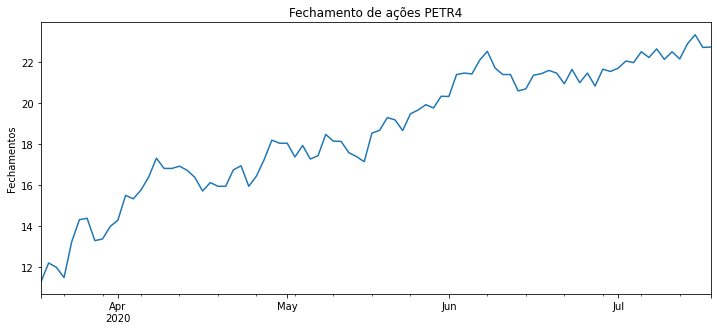

In [37]:
# Plotando os dados de origem
title = 'Fechamento de ações PETR4'
ylabel='Fechamentos'
xlabel='' # we don't really need a label here

ax = df1['Close'].plot(figsize=(12,5),title=title);
ax.set(xlabel=xlabel, ylabel=ylabel);

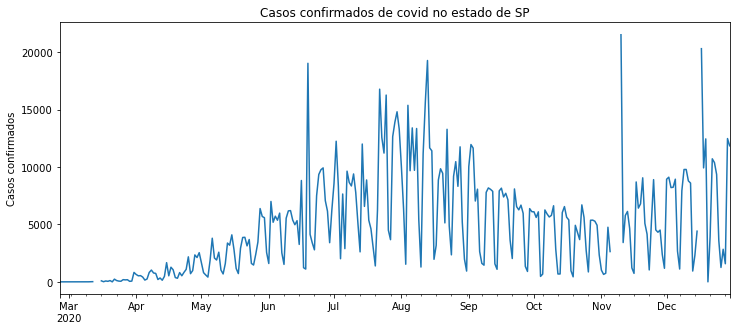

In [38]:
# Plotando os dados de origem
title = 'Casos confirmados de covid no estado de SP'
ylabel='Casos confirmados'
xlabel='' # we don't really need a label here

ax = df2['confirmed'].plot(figsize=(12,5),title=title);
ax.set(xlabel=xlabel, ylabel=ylabel);

**4. Obtenha os gráficos de autocorrelação e autocorrelação parcial para ambas as aplicações. Que características você observa nesses gráficos? Que modelo sugeriria com base nos correlogramas?**

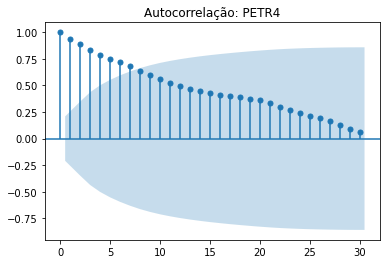

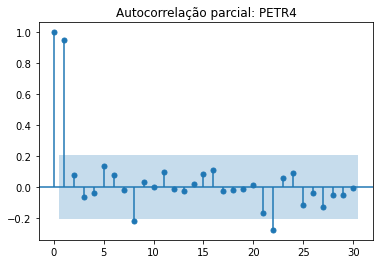

In [39]:
lags=30
y = df1['Close']
title='Autocorrelação: PETR4'
plot_acf(y,title=title,lags=lags)
title='Autocorrelação parcial: PETR4'
plot_pacf(y,title=title,lags=lags);

PETR4: Característica de série Autoregressiva (AR).

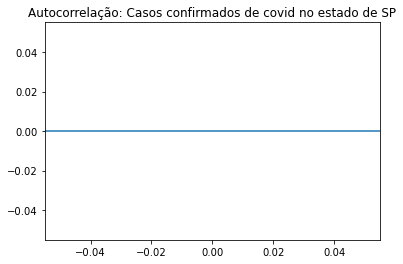

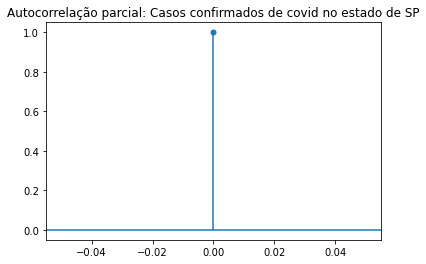

In [40]:
lags=30
y = df2['confirmed']
title='Autocorrelação: Casos confirmados de covid no estado de SP'
plot_acf(y,title=title,lags=lags)
title='Autocorrelação parcial: Casos confirmados de covid no estado de SP'
plot_pacf(y,title=title,lags=lags);

Casos confirmados de covid no estado de SP: Presença de sazonalidade semanal.

**5. Repita os gráficos de autocorrelação e autocorrelação parcial para a primeira diferença de cada aplicação. O que você pode concluir?**

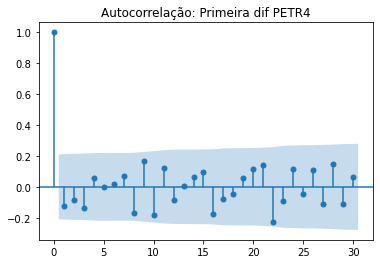

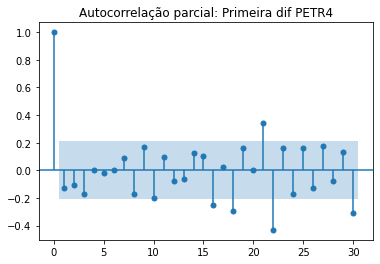

In [41]:
lags=30
y = np.diff(df1['Close'])
title='Autocorrelação: Primeira dif PETR4'
plot_acf(y,title=title,lags=lags)
title='Autocorrelação parcial: Primeira dif PETR4'
plot_pacf(y,title=title,lags=lags);

PETR4 primeira dif: Gráficos de Autocorr e Autocorr parcial apresentam comportamento similar.<br>
Correlação forte apenas com a observaçao anterior.

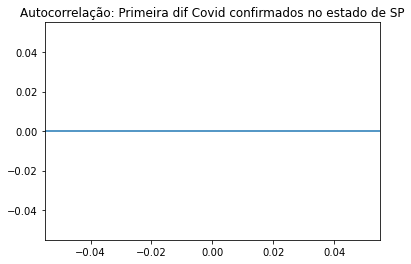

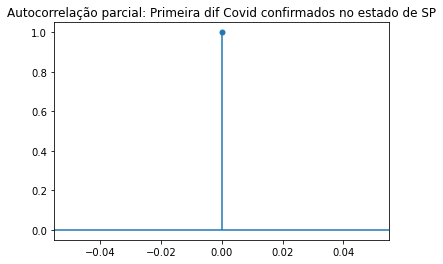

In [42]:
lags=30
y = np.diff(df2['confirmed'])
title='Autocorrelação: Primeira dif Covid confirmados no estado de SP'
plot_acf(y,title=title,lags=lags)
title='Autocorrelação parcial: Primeira dif Covid confirmados no estado de SP'
plot_pacf(y,title=title,lags=lags);

Confirmed: Correlação com as 6 observações anteriores.

**6. Para os dados de PETR4, refaça a modelagem vista em aula.**

In [44]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from pmdarima import auto_arima

In [51]:
stepwise_fit = auto_arima(df1['Close'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=7,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=False)           # set to stepwise

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=152.390, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=152.598, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=153.296, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=153.013, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.746, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=154.697, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=154.117, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=154.674, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=152.945, Time=0.19 sec
Total fit time: 0.588 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -74.195
Date:                Sat, 31 Jul 2021   AIC                            152.390
Time:                        16:05:25   BIC                            157.322
Sample:                             0   HQIC                           154.376
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.062      2.124      0.034       0.010       0.253
sigma2         0.3223      0.053      6.046      0.000       0.218       0.427
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.24   Prob(JB):                         0.57
Heteroskedasticity (H):               0.57   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**7. Desafio: Ainda não vimos o modelo SARIMA, mas já sabemos que a série de COVID-19 tem sazonalidade. Como os dados de COVID-19 apresentam sazonalidade, vamos arriscar no tema da próxima aula? Altere seasonal para True e escolha o melhor modelo entre os SARIMA propostos. Discutiremos com detalhes este modelo na Aula 4.**

In [48]:
stepwise_fit = auto_arima(df2['confirmed'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=7,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5922.655, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6007.140, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5916.437, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5845.769, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6005.169, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=5891.230, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5778.833, Time=0.47 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=5816.796, Time=0.25 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=5760.697, Time=0.59 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=5787.505, Time=0.59 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=5813.772, Time=0.57 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=5924.639, Time=0.44 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=5772.712, Time=0.68 sec
 ARIMA(0,1,2)(2,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  309
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2874.364
Date:                           Sat, 31 Jul 2021   AIC                           5756.727
Time:                                   15:25:24   BIC                           5771.648
Sample:                                        0   HQIC                          5762.693
                                           - 309                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9021      0.027    -33.593      0.000      -0.955      -0.849
ar.S.L7        0.9673      0.034     28.507      0.000       0.901       1.034
ma.S.L7       -0.7733      0.067    -11.460      0.000      -0.906      -0.641
sigma2      7.315e+06   2.74e+05     26.680      0.000    6.78e+06    7.85e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):              2203.69
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):              16.15   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5922.655, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6007.140, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5916.437, Time=1.13 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5845.769, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6005.169, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=5891.230, Time=0.39 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5778.723, Time=3.51 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=5816.796, Time=1.63 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=5760.227, Time=7.78 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=5787.547, Time=8.38 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=24.75 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=5813.817, Time=18.18 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=5924.654, Time=7.31 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=5772.130, Time=23.93 sec
 ARIMA(0,1,2)(2,0,1)[7] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  309
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2874.364
Date:                           Wed, 28 Jul 2021   AIC                           5756.727
Time:                                   23:55:15   BIC                           5771.648
Sample:                                        0   HQIC                          5762.693
                                           - 309                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9021      0.027    -33.593      0.000      -0.955      -0.849
ar.S.L7        0.9673      0.034     28.508      0.000       0.901       1.034
ma.S.L7       -0.7733      0.067    -11.460      0.000      -0.906      -0.641
sigma2      7.315e+06   2.74e+05     26.680      0.000    6.78e+06    7.85e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):              2203.69
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):              16.15   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""